<a href="https://colab.research.google.com/github/saranga0427/Guvi/blob/main/Task5_Saranga_Assessment2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 5:

The data is available as two attached CSV files:
1. takehome_user_engagement. csv
2. takehome_users . csv

Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one seven­day period , identify which factors predict future user
adoption .
We suggest spending 1­2 hours on this, but you're welcome to spend more or less.
Please send us a brief writeup of your findings (the more concise, the better ­­ no more
than one page), along with any summary tables, graphs, code, or queries that can help
us understand your approach. Please note any factors you considered or investigation
you did, even if they did not pan out. Feel free to identify any further research or data
you think would be valuable.

## 1. Loading Data

In [47]:
import pandas as pd

In [48]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**User table- Gives info about the users**

In [49]:
#encoding='latin-1' - avoid 'utf-8' codec can't decode byte 0xe6 in position 1239: invalid continuation byte 
users = pd.read_csv('drive/My Drive/Projects DS/takehome_users.csv', encoding='latin-1')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


We will have to check if data-time datatypes is coded accurately and also we will be taking out personla information of the users which will not be useful to us and to proctect the identity of the users. 

**Usage table- Gives info about the times user has logged into the product**

In [50]:
#loading datasets
usage= pd.read_csv("drive/My Drive/Projects DS/takehome_user_engagement.csv")
usage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


We might need to combine the data for a week instead of having it daily as task asks for visit in 7 days. Also we might even look at combining the above two dataframes.

##2. Data Cleaning and Data Preparation

###2.1 Exploring Data for Cleaning

In [51]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [52]:
#checking for data types and null values
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [53]:
#exploring null values
users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

The last_session_creation_time and invited_by_user_id columsn have missing values. We will be dealing with missing values. The last_session_creation_time is unix timestamp but we see the timestamp as float. We will have to convert that to datetime too.

In [54]:
usage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [55]:
usage.nunique()

time_stamp    207220
user_id         8823
visited            1
dtype: int64

In [56]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [57]:
usage.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

There are no missing values is usage. Usage has data for 8823 of 12000 registered users. No data cleaning needed here. After comparing, we can see that the column name odject_id in users dataframe is incorrect, hence we will be renaming it. 

In [58]:
#drop object_id 
users['user_id']= users['object_id']
users.drop('object_id', axis=1, inplace=True)

In [59]:
#change dtype of last_session_creation_time
users['last_session_creation_time']= pd.to_datetime(users['last_session_creation_time'],unit='s')
users.last_session_creation_time.dtypes

dtype('<M8[ns]')

In [60]:
#check
users.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id
0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1
1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2
2,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,3
3,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,4
4,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5


We can see that last_session_creation_time can be seen in a datetime format now.

In [61]:
#let's check start and end for dates
users['last_session_creation_time'].min(), users['last_session_creation_time'].max()

(Timestamp('2012-05-31 08:20:06'), Timestamp('2014-06-06 14:58:50'))

In [62]:
users['creation_time'].min(), users['creation_time'].max()

('2012-05-31 00:43:27', '2014-05-30 23:59:19')

###2.2 Getting dataframe with adopted users

**Finding adopted users**

We will now find users which were active for 3 or more days on last 7 days and add it as a new column labeled asopted user. 

In [63]:
#temporary df for finding the adopted user
temp = usage.copy()

In [64]:
#convert time_stamp from text to date
temp['time_stamp']= pd.to_datetime(temp['time_stamp'])

In [65]:
#get only date component of timestamp and save it as date
temp['date'] = pd.to_datetime(temp.time_stamp.dt.date)
temp.head()

,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


Now we have dated and we can use these dates to find adopted users

In [66]:
#function for counting the days user has logged in 

def rolling_count(dframe, frequency):
  return dframe.rolling(frequency, on='date')['user_id'].count()

In [67]:
#check
rolling_count(temp, 7)

/usr/local/lib/python3.8/dist-packages/pandas/core/window/rolling.py:1625: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(


0         1.0
1         2.0
2         3.0
3         4.0
4         5.0
         ... 
207912    7.0
207913    7.0
207914    7.0
207915    7.0
207916    7.0
Name: user_id, Length: 207917, dtype: float64

In [68]:
#using groupby to make check activity in last 7 days
temp['7_day_activity']= temp.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, '7D')

In [69]:
#check
temp.head()

,time_stamp,user_id,visited,date,7_day_activity
0,2014-04-22 03:53:30,1,1,2014-04-22,1.0
1,2013-11-15 03:45:04,2,1,2013-11-15,1.0
2,2013-11-29 03:45:04,2,1,2013-11-29,1.0
3,2013-12-09 03:45:04,2,1,2013-12-09,1.0
4,2013-12-25 03:45:04,2,1,2013-12-25,1.0


In [70]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   time_stamp      207917 non-null  datetime64[ns]
 1   user_id         207917 non-null  int64         
 2   visited         207917 non-null  int64         
 3   date            207917 non-null  datetime64[ns]
 4   7_day_activity  207917 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 7.9 MB


In [71]:
temp['7_day_activity'].value_counts()

7.0    47183
4.0    29276
5.0    28884
3.0    27754
6.0    27425
2.0    23954
1.0    23441
Name: 7_day_activity, dtype: int64

In [72]:
#let's check for 7_day_activity 3 or more days
temp[temp['7_day_activity'] >=3]

,time_stamp,user_id,visited,date,7_day_activity
9,2014-02-09 03:45:04,2,1,2014-02-09,3.0
10,2014-02-13 03:45:04,2,1,2014-02-13,3.0
27,2013-02-19 22:08:03,10,1,2013-02-19,3.0
30,2013-03-02 22:08:03,10,1,2013-03-02,3.0
31,2013-03-05 22:08:03,10,1,2013-03-05,3.0
...,...,...,...,...,...
207898,2014-05-23 11:04:47,11988,1,2014-05-23,6.0
207899,2014-05-24 11:04:47,11988,1,2014-05-24,6.0
207900,2014-05-26 11:04:47,11988,1,2014-05-26,5.0
207901,2014-05-27 11:04:47,11988,1,2014-05-27,5.0


In [73]:
#grouping as per user_id and saving it as user_adopted dataframe
user_adopted = temp.groupby('user_id')['7_day_activity'].max().reset_index()

In [74]:
user_adopted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         8823 non-null   int64  
 1   7_day_activity  8823 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 138.0 KB


In [75]:
#add column user_adopted to the df
user_adopted['adopted_user']= user_adopted['7_day_activity'].apply(lambda x :1 if x>=3 else 0 )
user_adopted.head()

,user_id,7_day_activity,adopted_user
0,1,1.0,0
1,2,3.0,1
2,3,1.0,0
3,4,1.0,0
4,5,1.0,0


In [76]:
user_adopted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         8823 non-null   int64  
 1   7_day_activity  8823 non-null   float64
 2   adopted_user    8823 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 206.9 KB


In [77]:
user_adopted['adopted_user'].value_counts()

0    7221
1    1602
Name: adopted_user, dtype: int64

In [78]:
#drop irrelevant columns
user_adopted.drop('7_day_activity', axis= 1, inplace = True)

In [79]:
user_adopted.head()

,user_id,adopted_user
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [80]:
#We will be joining temp with users dataframe
#first set index to user_id
user_adopted.set_index('user_id', inplace =True)
user_adopted.head()

,adopted_user
user_id,
1,0
2,1
3,0
4,0
5,0


In [81]:
#joining dfs
user_df= users.join(user_adopted, on= 'user_id', how='left')
user_df.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted_user
0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1,0.0
1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2,1.0
2,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,3,0.0
3,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,4,0.0
4,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5,0.0


Now we have the final dataframe that we will be using for our model. We will be checking for data cleaning and data preparation now. 

###2.3 Data cleaning

In [82]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               12000 non-null  object        
 1   name                        12000 non-null  object        
 2   email                       12000 non-null  object        
 3   creation_source             12000 non-null  object        
 4   last_session_creation_time  8823 non-null   datetime64[ns]
 5   opted_in_to_mailing_list    12000 non-null  int64         
 6   enabled_for_marketing_drip  12000 non-null  int64         
 7   org_id                      12000 non-null  int64         
 8   invited_by_user_id          6417 non-null   float64       
 9   user_id                     12000 non-null  int64         
 10  adopted_user                8823 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)


####1. Missing Values

In [83]:
#last_session_creation_time,invited_by_user_id and adopted_user
#filling last_session_creation_time   with zero, it means the usr never visited the product post created. 
user_df['last_session_creation_time'].fillna(0, inplace = True)
#filling adopted_user by zero which means user wasn't adopted
user_df['adopted_user'].fillna(0, inplace = True)
#filling invited_by_user_id with zero meaning the user wasn't invited any other user
user_df.invited_by_user_id.fillna(0, inplace=True)

In [84]:
user_df.isnull().sum()

creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
user_id                       0
adopted_user                  0
dtype: int64

####2. Selecting Relevant Columns

The name, email columns can be dropped as they contain personal information of the user. We can drop last_session_creation_time as adopted_user is created from that column. user_id can also be dropped. 
creation_time can be made easy to use by adding a column that shows how old the account is and then we can drop creation_time.

In [85]:
user_df['creation_time']= pd.to_datetime(user_df['creation_time'])#is text,converting to datetime
usage['time_stamp']= pd.to_datetime(usage['time_stamp'])#is text,converting to datetime
#adding the column
user_df['days_creation']= (usage.time_stamp.max() - user_df.creation_time).dt.days

In [86]:
#drop columns
user_df.drop(['name','email', 'creation_time', 'last_session_creation_time', 'user_id' ],axis=1, inplace=True)
user_df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,days_creation
0,GUEST_INVITE,1,0,11,10803.0,0.0,45
1,ORG_INVITE,0,0,1,316.0,1.0,203
2,ORG_INVITE,0,0,94,1525.0,0.0,443
3,GUEST_INVITE,0,0,1,5151.0,0.0,381
4,GUEST_INVITE,0,0,193,5240.0,0.0,505


####4. Encoding

In [87]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   opted_in_to_mailing_list    12000 non-null  int64  
 2   enabled_for_marketing_drip  12000 non-null  int64  
 3   org_id                      12000 non-null  int64  
 4   invited_by_user_id          12000 non-null  float64
 5   adopted_user                12000 non-null  float64
 6   days_creation               12000 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 656.4+ KB


In [88]:
#creation_source
user_df['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [89]:
#OHE as there is no inherent order
user_df = pd.get_dummies(user_df, columns=['creation_source'])

In [90]:
user_df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,days_creation,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,10803.0,0.0,45,1,0,0,0,0
1,0,0,1,316.0,1.0,203,0,1,0,0,0
2,0,0,94,1525.0,0.0,443,0,1,0,0,0
3,0,0,1,5151.0,0.0,381,1,0,0,0,0
4,0,0,193,5240.0,0.0,505,1,0,0,0,0


####5. X, y split

In [91]:
y=user_df['adopted_user']
X= user_df.drop('adopted_user', axis=1)

####6.Splitting the data into Train and Test sets

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 1)

In [94]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(9600, 10) (2400, 10)
(9600,) (2400,)


####7. Feature Scaling

Not required as we will be using Random Forest Algorithm 

##3. Machine Learning Model

We will be using random forest model to fit the model and find the important features. 


####3.1 Model Building

In [96]:
#importing the model
from sklearn.ensemble import RandomForestClassifier
#importing metrics- f1score and confusion matrix
from sklearn.metrics import f1_score, plot_confusion_matrix

In [113]:
#object creation
rfc= RandomForestClassifier(n_estimators=20,random_state=0,criterion='gini', class_weight='balanced')

In [114]:
#training the models
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=20, random_state=0)

####3.2 Model Scores

In [115]:
#train scores- accuracy
tr_score= rfc.score(X_train, y_train)
tr_score

0.9904166666666666

In [116]:
#test scores- accuracy
te_score= rfc.score(X_train, y_train)
te_score

0.9904166666666666

###3.3 Important features

We will find the important features by using feature_importances_ 

In [123]:
rfc.feature_importances_

array([0.01634471, 0.01190659, 0.34399497, 0.16731635, 0.42825949,
       0.00576255, 0.0039806 , 0.01234746, 0.00422143, 0.00586585])

In [131]:
importFeature = rfc.feature_importances_
feature_importances=pd.DataFrame([importFeature])
feature_importances

,0,1,2,3,4,5,6,7,8,9
0,0.016345,0.011907,0.343995,0.167316,0.428259,0.005763,0.003981,0.012347,0.004221,0.005866


In [133]:
import numpy as np
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)
indices = np.argsort(importFeature)[::-1]

In [134]:
std

array([0.00641832, 0.00504242, 0.01887294, 0.01209268, 0.0176443 ,
       0.0035519 , 0.00293435, 0.00370015, 0.00247852, 0.00394925])

In [135]:
indices

array([4, 2, 3, 0, 7, 1, 9, 5, 8, 6])

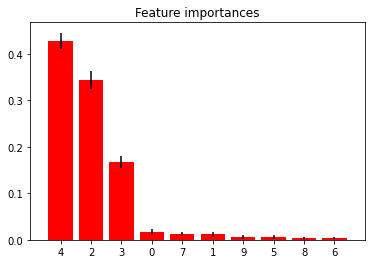

In [136]:
from matplotlib import pyplot as plt
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importFeature[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [137]:
col_names=X_train.columns

In [138]:
feature_importances=pd.DataFrame(pd.Series(col_names)[indices])
feature_importances['importance']=np.sort(importFeature)[::-1]
feature_importances.columns=['features','importance']
feature_importances

,features,importance
4,days_creation,0.428259
2,org_id,0.343995
3,invited_by_user_id,0.167316
0,opted_in_to_mailing_list,0.016345
7,creation_source_PERSONAL_PROJECTS,0.012347
1,enabled_for_marketing_drip,0.011907
9,creation_source_SIGNUP_GOOGLE_AUTH,0.005866
5,creation_source_GUEST_INVITE,0.005763
8,creation_source_SIGNUP,0.004221
6,creation_source_ORG_INVITE,0.003981


The top features are:
1. days_creation
2. org_id
3. invited_by_user_id
4. opted_in_to_mailing_list
5. creation_source_PERSONAL_PROJECTS